# Week 2 Statistical Learning - Regression and Model Evaluation

### Jonathan Gragg - East Section

## Part One - Regression with the Ames Housing Data Set

### 1. Load the Ames housing data. We will use the variables Sale_Price, Lot_Area, Year_Built, Gr_Liv_Area, Total_Bsmt_SF, Full_Bath to predict Sale_Price. Print the first few rows. (5 pts)

In [145]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV, Lasso, Ridge
from sklearn.model_selection import KFold, GridSearchCV, cross_validate, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, accuracy_score,\
    recall_score, precision_score, roc_curve, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

ames = pd.read_csv('ames.csv')
cols = ['Sale_Price', 'Lot_Area', 'Year_Built', 'Gr_Liv_Area', 'Total_Bsmt_SF', 'Full_Bath']
data = ames[cols].copy()
data = data.dropna()

data.shape

(2930, 6)

### 2. Create a vector "y" of the response variable and a matrix "X" of predictors. Standardize both so that each column has mean 0 and variance 1. Print the first few rows of X. (5 pts)

In [146]:
y = data.Sale_Price.values.reshape(-1,1)
X = data.drop('Sale_Price', axis=1).values

# rescalling the data to fit the linear model
scaler = StandardScaler(with_mean=0,with_std=1)
scaler.fit(X)
X = scaler.transform(X)

scaler = StandardScaler(with_mean=0,with_std=1)
scaler.fit(y)
y = scaler.transform(y)

print('Predictor Matrix X')
print(X[:4,])

Predictor Matrix X
[[ 4.03240498 64.81438858  3.27646597  2.44957526  1.80882118]
 [ 1.47512152 64.84745715  1.77277386  2.00048646  1.80882118]
 [ 1.81083796 64.74825145  2.62948265  3.01433845  1.80882118]
 [ 1.4164822  65.07893711  4.17472415  4.78574426  3.61764237]]


### 3. Fit 3 linear regression models to predict y from X. For each model, print the RMSE using the entire dataset (i.e. you don't need to split into training and testing). (10 pts)



* Model 1: Use all of the variables as predictors

In [147]:
ln = LinearRegression()

ln.fit(X,y)

preds = ln.predict(X)
mse = mean_squared_error(y,preds)
rmse = np.sqrt(mse)

print('Model 1 RMSE:', rmse)

Model 1 RMSE: 0.5336628080215019


* Model 2: Use all of the variables, but also add interactions and quadratic terms.

In [148]:
poly = PolynomialFeatures(degree=2)
Z2 = poly.fit_transform(X)

ln.fit(Z2,y)

preds = ln.predict(Z2)
mse = mean_squared_error(y,preds)
rmse = np.sqrt(mse)

print('Model 2 RMSE:', rmse)

Model 2 RMSE: 0.44834688197535655


* Model 3: Use all of the variables, but also add interactions, quadratic and cubic terms.

In [149]:
poly = PolynomialFeatures(degree=3)
Z3 = poly.fit_transform(X)

ln.fit(Z3,y)

preds = ln.predict(Z3)
mse = mean_squared_error(y,preds)
rmse = np.sqrt(mse)

print('Model 3 RMSE:', rmse)

Model 3 RMSE: 0.37941846256257433


### 4. Fit each model again, but this time use 10-fold cross validation. For each model fit, calculate the error (RMSE) from the training set and test set. Create a chart that summarizes the training and test error distributions for each model. (20 pts)

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

cv = KFold(10, shuffle=True)

train_scores = np.empty((10))
validation_scores = np.empty((10))

for k, (train_index, test_index) in enumerate(cv.split(X_train)):
    ln = LinearRegression()
    ln.fit(X_train[train_index], y_train[train_index])
    train_scores[k] = np.sqrt(mean_squared_error(y_train[train_index],ln.predict(X_train[train_index])))
    validation_scores[k] = np.sqrt(mean_squared_error(y_train[test_index],ln.predict(X_train[test_index])))

mod1_t = train_scores
mod1_v = validation_scores

Z2_train, Z2_test, y_train, y_test = train_test_split(Z2,y,test_size=.2)

cv = KFold(10, shuffle=True)

train_scores = np.empty((10))
validation_scores = np.empty((10))

for k, (train_index, test_index) in enumerate(cv.split(Z2_train)):
    ln = LinearRegression()
    ln.fit(Z2_train[train_index], y_train[train_index])
    train_scores[k] = np.sqrt(mean_squared_error(y_train[train_index],ln.predict(Z2_train[train_index])))
    validation_scores[k] = np.sqrt(mean_squared_error(y_train[test_index],ln.predict(Z2_train[test_index])))

mod2_t = train_scores
mod2_v = validation_scores

Z3_train, Z3_test, y_train, y_test = train_test_split(Z3,y,test_size=.2)

cv = KFold(10, shuffle=True)

train_scores = np.empty((10))
validation_scores = np.empty((10))

for k, (train_index, test_index) in enumerate(cv.split(Z3_train)):
    ln = LinearRegression()
    ln.fit(Z3_train[train_index], y_train[train_index])
    train_scores[k] = np.sqrt(mean_squared_error(y_train[train_index],ln.predict(Z3_train[train_index])))
    validation_scores[k] = np.sqrt(mean_squared_error(y_train[test_index],ln.predict(Z3_train[test_index])))

mod3_t = train_scores
mod3_v = validation_scores

data = np.transpose(np.array([mod1_t,mod1_v,mod2_t,mod2_v,mod3_t,mod3_v]))
pd.DataFrame(data,columns=['Mod 1 Train','Mod 1 Test','Mod 2 Train','Mod 2 Test','Mod 3 Train', 'Mod 3 Test'])

,Mod 1 Train,Mod 1 Test,Mod 2 Train,Mod 2 Test,Mod 3 Train,Mod 3 Test
0,0.529691,0.497514,0.443622,0.544842,0.378318,0.380050
1,0.489396,0.797855,0.454166,0.435293,0.369976,2.712255
2,0.526776,0.524597,0.441420,0.552595,0.375695,0.560622
3,0.533420,0.461601,0.448982,0.476746,0.380321,0.376968
4,0.532112,0.473335,0.451402,0.456894,0.379260,0.360311
5,0.531737,0.476110,0.456841,0.401003,0.371734,0.473280
6,0.522611,0.561071,0.451949,0.449355,0.373590,0.420771
7,0.528504,0.509143,0.450665,0.495133,0.376302,0.393961
8,0.525820,0.532639,0.455415,0.420225,0.372987,0.617817
9,0.538849,0.397521,0.445269,0.531981,0.360361,0.781991


### 5. We want to predict the sale price of a home not included in this dataset. Write a short paragraph explaining which model you would recommend for this problem and why. (10 pts)

Based on the RMSE output above I would recommend **Model 2** be used to predict housing prices. The reason is that Model 2 has the lowest RMSE on the test data set meaning that when validating it would be the most accurate model on data it was not trained on. Model 1 had a much higher RMSE and Model 3 looks to be overfit to the training data set and is not as applicable in a real world application.

## Part Two: Classification with the Heart Disease Data Set

### 1. Load the heart disease data. The response variable, "hd", has been encoded as a binary variable (1 for heart disease, 0 without heart disease). Extract this as a vector and call this "y". Print the proportion of individuals in this data that have heart disease. (2 pts)

In [ ]:
heart = pd.read_csv('heart.csv')
y = heart.hd.values.reshape(-1,1)
unique, counts = np.unique(y,return_counts=True)
p = counts[1] / sum(counts)
print('The proportion of individuals in this data with heart disease is', p.round(3))

The proportion of individuals in this data with heart disease is 0.459


### 2. We are going to fit a logistic regression model using the variables, age, trestbps, chol, thalach, sex, restecg, slope, and cp as predictors. Create a data matrix, X, of these predictors, and convert the categorical predictors to dummy variables (dropping the redundant column). Print the first few rows of X. (3 pts)

In [ ]:
cols = ['age', 'trestbps', 'chol', 'thalach', 'sex', 'restecg', 'slope','cp']
data = heart[cols].copy()
data = pd.get_dummies(data, drop_first=True)
X = data.copy().values

X[:4,]

array([[ 63, 145, 233, 150,   1,   0,   0,   0,   0,   0,   0,   1],
       [ 67, 160, 286, 108,   1,   0,   0,   1,   0,   0,   0,   0],
       [ 67, 120, 229, 129,   1,   0,   0,   1,   0,   0,   0,   0],
       [ 37, 130, 250, 187,   1,   1,   0,   0,   0,   0,   1,   0]],
      dtype=int64)

### 3. Split the data (X and y) into training and testing datasets using a 60%/40% split, stratifying on the response variable. Standardize the training data (features) so that each column has mean 0 and variance 1. Apply this transformation to the test data set. Print the first few rows of each matrix. (10 pts)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, stratify=y, random_state=1)

num_columns = [0,1,2,3]
scaler = StandardScaler(with_mean=0,with_std=1)
scaler.fit(X_train[:,num_columns])
X_train[:, num_columns] = scaler.transform(X_train[:,num_columns])

scaler = StandardScaler(with_mean=0,with_std=1)
scaler.fit(X_test[:,num_columns])
X_test[:, num_columns] = scaler.transform(X_test[:,num_columns])

print('Training Data set')
print(X_train[:4,])

print('Testing Data set')
print(X_test[:4,])

Training Data set
[[5 6 2 7 0 1 0 1 0 0 1 0]
 [8 7 3 4 0 0 0 1 0 0 1 0]
 [4 7 3 7 1 0 0 1 0 0 1 0]
 [5 8 5 5 1 1 0 1 0 0 0 0]]
Testing Data set
[[5 8 3 7 1 1 0 0 1 0 1 0]
 [5 6 5 7 1 1 0 0 0 1 0 0]
 [6 7 5 6 1 1 0 1 0 0 1 0]
 [5 7 4 7 1 0 0 0 1 0 1 0]]


### 4. Fit two models to the training data. Print the fitted coefficients from each model. (10 pts)

* Model 1: a logistic regression model (with no regularization)

In [ ]:
lr = LogisticRegression(penalty='none')

lr.fit(X_train,y_train)
lr.coef_

C:\Users\jgragg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\jgragg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 0.30237232,  0.32395209,  0.58167476, -0.5899138 ,  2.47577391,
         0.69675204,  3.92039593,  0.16896536, -1.67906946, -2.34536669,
        -2.3768187 , -2.67305566]])

* Model 2: an L1 regularized logistic regression model (choose the tuning parameter by using 10-fold cross validation on the training dataset).  (Hint: You might find the LogisticRegressionCV function useful for this part.)

In [ ]:
Cs = [.01,.1,1,10]
lr = LogisticRegressionCV(Cs=Cs, cv=10, penalty='l1',solver='liblinear')
lr.fit(X_train, y_train)
lr.coef_

C:\Users\jgragg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([[ 0.2466351 ,  0.26668922,  0.5382863 , -0.63744265,  2.31826568,
         0.60667455,  2.45089417,  0.05864553, -1.68132237, -2.27408609,
        -2.27872498, -2.525491  ]])

### 5. For both models, make predictions on the test set, and compute the following metrics: (10 pts)

* Model 1

In [ ]:
lr = LogisticRegression(penalty='none')

lr.fit(X_train,y_train)
preds_1 = lr.predict(X_test)
probs_1 = lr.predict_proba(X_test)[:, 1]

tn, fp, fn, tp = confusion_matrix(y_test, preds_1).ravel()
FPR = fp / (fp + tn)
FDR = fp / (fp + tp)

print('Accuracy:', lr.score(X_test, y_test).round(3))
print('FPR: ', FPR.round(3))
print('Recall: ', recall_score(y_test, preds_1).round(3))
print('Precision: ', precision_score(y_test, preds_1).round(3))
print('FDR: ', FDR.round(3))

Accuracy: 0.754
FPR:  0.212
Recall:  0.714
Precision:  0.741
FDR:  0.259


C:\Users\jgragg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\jgragg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* Model 2

In [ ]:
Cs = [.01,.1,1,10]
lr = LogisticRegressionCV(Cs=Cs, cv=10, penalty='l1',solver='liblinear')
lr.fit(X_train,y_train)
preds_2 = lr.predict(X_test)
probs_2 = lr.predict_proba(X_test)[:, 1]

tn, fp, fn, tp = confusion_matrix(y_test, preds_2).ravel()
FPR = fp / (fp + tn)
FDR = fp / (fp + tp)

print('Accuracy:', lr.score(X_test, y_test).round(3))
print('FPR: ', FPR.round(3))
print('Recall: ', recall_score(y_test, preds_2).round(3))
print('Precision: ', precision_score(y_test, preds_2).round(3))
print('FDR: ', FDR.round(3))

C:\Users\jgragg\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy: 0.754
FPR:  0.227
Recall:  0.732
Precision:  0.732
FDR:  0.268


### 6. Plot the ROC curves and compute the AUC for each model. (10 pts)

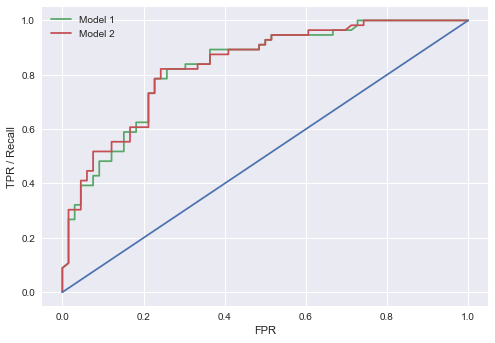

In [ ]:
fpr1, tpr1, thresh1 = roc_curve(y_test, probs_1)
fpr2, tpr2, thresh2 = roc_curve(y_test, probs_2)

import matplotlib as mpl
mpl.style.use('seaborn')
plt.plot(fpr1, tpr1, 'C1', label='Model 1')
plt.plot(fpr2, tpr2, 'C2', label='Model 2')
plt.plot([0,1],[0,1])
plt.xlabel('FPR')
plt.ylabel('TPR / Recall')
plt.legend()

### 7. The default classification rule for logistic regression is to label heart disease if the predicted probability is greater than 0.5. Based on the metrics and curves you plotted for the best model, what are some reasons you might increase or lower this threshold? What are the tradeoffs between false-positives and false-negatives? (5 pts)

When setting a threshold it is important to evaluate the problem you are trying to solve. For this scenario I would say it is okay to have more false positives than typical in order to diagnose as many cases of heart disease as possible. To adjust this you change the value of the threshold. Decreasing the threshold will create more positive predictions while increasing the threshold will create less positive predictions. 

For this scenerio I would not change the threshold. Increasing the false positive rate past 25% would create too many bad diagnoses. Decreasing the threshold would result in a lot of people getting falsely diagnosed with a serious disease. 